#### Test: can you build a model that predicts consumption? The electric consumption is located in the KWH field.

In [1]:
import numpy as np
import pandas as pd
import os
import glob
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'public_layout.csv',
 'recs2009_public.csv',
 'zesty AI assignment.ipynb']

In [3]:
df_meaning = pd.read_csv('public_layout.csv')

In [4]:
df_meaning

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8
...,...,...,...,...,...
935,WSF,Weather & shielding factor for the housing unit,936,Numeric,8
936,OA_LAT,Annual value for latent heat infiltration from...,937,Numeric,8
937,GWT,Annual average ground water temperature (F) fo...,938,Numeric,8
938,DesignDBT99,Dry bulb design temperature (F) expected to be...,939,Numeric,8


In [5]:
df_meaning['Variable Type'].value_counts()

Numeric      930
Character     10
Name: Variable Type, dtype: int64

In [6]:
df_meaning[df_meaning['Variable Name'] == 'KWH']

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
839,KWH,"Total Site Electricity usage, in kilowatt-hour...",840,Numeric,8


In [8]:
df_meaning[df_meaning['Variable Type'] == 'Character']

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
12,METROMICRO,Housing unit in Census Metropolitan Statistica...,13,Character,5
13,UR,Housing unit classified as urban or rural by C...,14,Character,1
833,ZTOTSQFT,Imputation flag for TOTSQFT,834,Character,1
834,ZTOTSQFT_EN,Imputation flag for TOTSQFT_EN,835,Character,1
835,ZTOTHSQFT,Imputation flag for TOTHSQFT,836,Character,1
836,ZTOTUSQFT,Imputation flag for TOTUSQFT,837,Character,1
837,ZTOTCSQFT,Imputation flag for TOTCSQFT,838,Character,1
838,ZTOTUCSQFT,Imputation flag for TOTUCSQFT,839,Character,1
931,IECC_Climate_Pub,International Energy Conservation Code (IECC) ...,932,Character,15


In [9]:
train  = pd.read_csv('recs2009_public.csv')

In [10]:
# dropping the unique ID
train.drop(['DOEID'],axis=1,inplace=True)

In [11]:
train.head()

,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,BASEHEAT,BASEHT2,PCTBSTHT,BASECOOL,BASECL2,PCTBSTCL,BASEUSE,ATTIC,ATTICFIN,FINATTRMS,ATTCHEAT,ATTCHT2,PCTATTHT,ATTCCOOL,ATTCCL2,PCTATTCL,ATTICUSE,PRKGPLC1,SIZEOFGARAGE,GARGLOC,GARGHEAT,GARGCOOL,PRKGPLC2,SIZEOFDETACH,OUTLET,ZKOWNRENT,ZCONDCOOP,ZYEARMADE,ZYEARMADERANGE,ZOCCUPYYRANGE,ZCONVERSION,ZORIG1FAM,ZLOOKLIKE,ZNUMFLRS,ZNUMAPTS,ZWALLTYPE,ZROOFTYPE,ZSTUDIO,ZNAPTFLRS,ZSTORIES,ZTYPEHUQ4,ZBEDROOMS,ZNCOMBATH,ZNHAFBATH,ZOTHROOMS,ZCELLAR,ZCRAWL,ZCONCRETE,ZBASEFIN,ZFINBASERMS,ZBASEHEAT,ZBASEHT2,ZPCTBSTHT,ZBASECOOL,ZBASECL2,ZPCTBSTCL,ZBASEUSE,ZATTIC,ZATTICFIN,ZFINATTRMS,ZATTCHEAT,ZATTCHT2,ZPCTATTHT,ZATTCCOOL,ZPCTATTCL,ZATTCCL2,ZATTICUSE,ZPRKGPLC1,ZSIZEOFGARAGE,ZGARGLOC,ZGARGHEAT,ZGARGCOOL,ZPRKGPLC2,ZSIZEOFDETACH,STOVEN,STOVENFUEL,STOVE,STOVEFUEL,OVEN,OVENFUEL,OVENUSE,OVENCLN,TYPECLN,MICRO,AMTMICRO,DEFROST,OUTGRILL,OUTGRILLFUEL,TOPGRILL,STGRILA,TOASTER,NUMMEAL,FUELFOOD,COFFEE,NUMFRIG,TYPERFR1,SIZRFRI1,REFRIGT1,ICE,AGERFRI1,ESFRIG,REPLCFRI,HELPFRI,HELPFRIY,TYPERFR2,SIZRFRI2,REFRIGT2,MONRFRI2,AGERFRI2,ESFRIG2,TYPERFR3,SIZRFRI3,REFRIGT3,MONRFRI3,AGERFRI3,ESFRIG3,SEPFREEZ,NUMFREEZ,UPRTFRZR,SIZFREEZ,FREEZER,AGEFRZR,REPLCFRZ,HELPFRZ,HELPFRZY,UPRTFRZR2,SIZFREEZ2,FREEZER2,AGEFRZR2,DISHWASH,DWASHUSE,AGEDW,ESDISHW,REPLCDW,HELPDW,HELPDWY,ZSTOVEN,ZSTOVENFUEL,ZSTOVE,ZSTOVEFUEL,ZOVEN,ZOVENFUEL,ZOVENUSE,ZOVENCLN,ZTYPECLN,ZMICRO,ZAMTMICRO,ZDEFROST,ZOUTGRILL,ZOUTGRILLFUEL,ZTOPGRILL,ZSTGRILA,ZTOASTER,ZNUMMEAL,ZFUELFOOD,ZCOFFEE,ZNUMFRIG,ZTYPERFR1,ZSIZRFRI1,ZREFRIGT1,ZICE,ZAGERFRI1,ZTYPERFR2,ZSIZRFRI2,ZREFRIGT2,ZMONRFRI2,ZAGERFRI2,ZTYPERFR3,ZSIZRFRI3,ZREFRIGT3,ZMONRFRI3,ZAGERFRI3,ZSEPFREEZ,ZNUMFREEZ,ZUPRTFRZR,ZSIZFREEZ,ZFREEZER,ZAGEFRZR,ZUPRTFRZR2,ZSIZFREEZ2,ZFREEZER2,ZAGEFRZR2,ZDISHWASH,ZDWASHUSE,ZAGEDW,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,AGECWASH,ESCWASH,REPLCCW,HELPCW,HELPCWY,DRYER,DRYRFUEL,DRYRUSE,AGECDRYER,TVCOLOR,TVSIZE1,TVTYPE1,CABLESAT1,COMBODVR1,DVR1,DIGITSTB1,PLAYSTA1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWD1,TVONWDWATCH1,TVONWE1,TVONWEWATCH1,TVSIZE2,TVTYPE2,CABLESAT2,COMBODVR2,DVR2,DIGITSTB2,PLAYSTA2,COMBOVCRDVD2,VCR2,DVD2,TVAUDIOSYS2,OTHERSTB2,TVONWD2,TVONWDWATCH2,TVONWE2,TVONWEWATCH2,TVSIZE3,TVTYPE3,CABLESAT3,COMBODVR3,DVR3,DIGITSTB3,PLAYSTA3,COMBOVCRDVD3,VCR3,DVD3,TVAUDIOSYS3,OTHERSTB3,TVONWD3,TVONWDWATCH3,TVONWE3,TVONWEWATCH3,COMPUTER,NUMPC,PCTYPE1,MONITOR1,TIMEON1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,TIMEON2,PCONOFF2,PCSLEEP2,PCTYPE3,MONITOR3,TIMEON3,PCONOFF3,PCSLEEP3,INTERNET,INDIALUP,INDSL,INCABLE,INSATEL,INWIRELESS,PCPRINT,FAX,COPIER,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,BATCHRG,CHRGPLGT,ELECDEV,ELECCHRG,CHRGPLGE,ZCWASHER,ZTOPFRONT,ZWASHLOAD,ZWASHTEMP,ZRNSETEMP,ZAGECWASH,ZDRYER,ZDRYRFUEL,ZDRYRUSE,ZAGECDRYER,ZTVCOLOR,ZTVSIZE1,ZTVTYPE1,ZCABLESAT1,ZCOMBODVR1,ZDVR1,ZDIGITSTB1,ZPLAYSTA1,ZCOMBOVCRDVD1,ZVCR1,ZDVD1,ZTVAUDIOSYS1,ZOTHERSTB1,ZTVONWD1,ZTVONWDWATCH1,ZTVONWE1,ZTVONWEWATCH1,ZTVSIZE2,ZTVTYPE2,ZCABLESAT2,ZCOMBODVR2,ZDVR2,ZDIGITSTB2,ZPLAYSTA2,ZCOMBOVCRDVD2,ZVCR2,ZDVD2,ZTVAUDIOSYS2,ZOTHERSTB2,ZTVONWD2,ZTVONWDWATCH2,ZTVONWE2,ZTVONWEWATCH2,ZTVSIZE3,ZTVTYPE3,ZCABLESAT3,ZCOMBODVR3,ZDVR3,ZDIGITSTB3,ZPLAYSTA3,ZCOMBOVCRDVD3,ZVCR3,ZDVD3,ZTVAUDIOSYS3,ZOTHERSTB3,ZTVONWD3,ZTVONWDWATCH3,ZTVONWE3,ZTVONWEWATCH3,ZCOMPUTER,ZNUMPC,ZPCTYPE1,ZMONITOR1,ZTIMEON1,ZPCONOFF1,ZPCSLEEP1,ZPCTYPE2,ZMONITOR2,ZTIMEON2,ZPCONOFF2,ZPCSLEEP2,ZPCTYPE3,ZMONITOR3,ZTIMEON3,ZPCONOFF3,ZPCSLEEP3,ZINTERNET,ZINDIALUP,ZINDSL,ZINCABLE,ZINSATEL,ZINWIRELESS,ZPCPRINT,ZFAX,ZCOPIER,ZWELLPUMP,ZDIPSTICK,ZSWAMPCOL,ZAQUARIUM,ZSTEREO,ZNOCORD,ZANSMACH,ZBATTOOLS,ZBATCHRG,ZCHRGPLGT,ZELECDEV,ZELECCHRG,ZCHRGPLGE,HEATHOME,DNTHEAT,EQUIPNOHEAT,FUELNOHEAT,EQUIPM,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,HELPHT,H

In [12]:
train.shape

(12083, 939)

In [13]:
train.dtypes.value_counts()

int64      884
float64     50
object       5
dtype: int64

In [14]:
train.isnull().T.any().T.sum()

0

<AxesSubplot:>

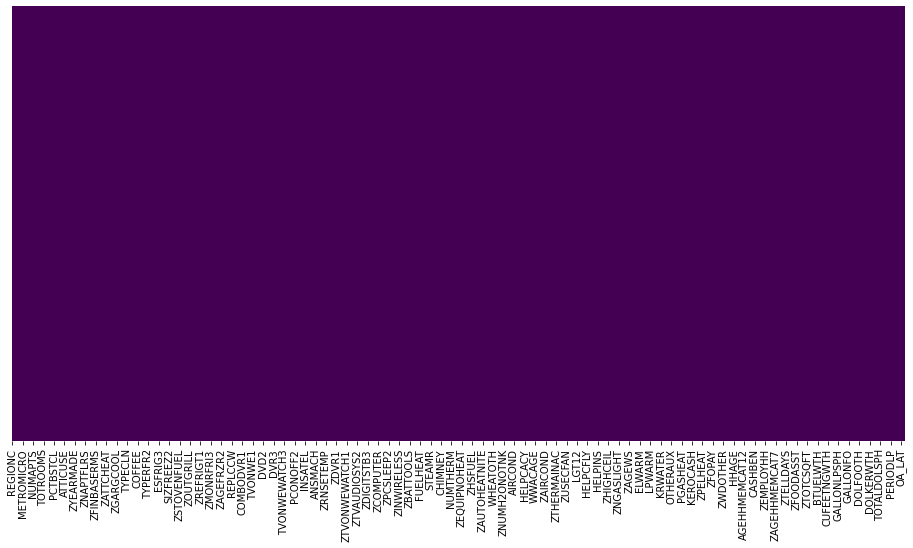

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)


<AxesSubplot:ylabel='Frequency'>

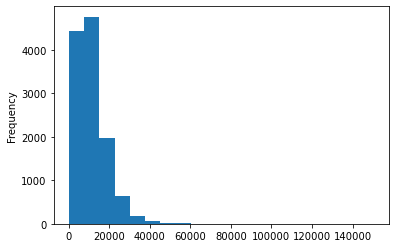

In [16]:
train.KWH.plot(kind = 'hist',bins = 20)

### KWH does not have a normal distribution

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 8.000e+00, 1.900e+01, 5.700e+01,
        1.430e+02, 4.070e+02, 8.320e+02, 1.433e+03, 2.043e+03, 2.600e+03,
        2.312e+03, 1.518e+03, 5.670e+02, 1.100e+02, 2.300e+01, 3.000e+00,
        1.000e+00]),
 array([ 2.83321334,  3.19668811,  3.56016287,  3.92363764,  4.2871124 ,
         4.65058717,  5.01406194,  5.3775367 ,  5.74101147,  6.10448623,
         6.467961  ,  6.83143576,  7.19491053,  7.55838529,  7.92186006,
         8.28533482,  8.64880959,  9.01228435,  9.37575912,  9.73923388,
        10.10270865, 10.46618341, 10.82965818, 11.19313294, 11.55660771,
        11.92008247]),
 <BarContainer object of 25 artists>)

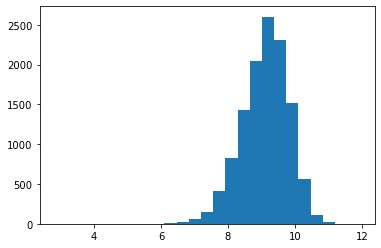

In [17]:
plt.hist(np.log(train.KWH),bins=25)

## log(KWH) has a normal distribution, my be we can take our target variable the log(KWH)

In [18]:
train['logKWH'] = np.log(train.KWH)

## Some Categorical Variables

- 'DOEID', 'METROMICRO', 'UR', 'ZTOTSQFT', 'ZTOTSQFT_EN',
- 'ZTOTHSQFT', 'ZTOTUSQFT', 'ZTOTCSQFT', 'ZTOTUCSQFT',
-       'IECC_Climate_Pub'

In [19]:
train.METROMICRO.value_counts()

METRO    10302
MICRO     1109
NONE       672
Name: METROMICRO, dtype: int64

<AxesSubplot:xlabel='METROMICRO', ylabel='count'>

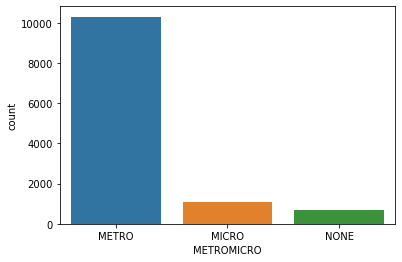

In [20]:
sns.countplot(train.METROMICRO)

<AxesSubplot:xlabel='DIVISION', ylabel='count'>

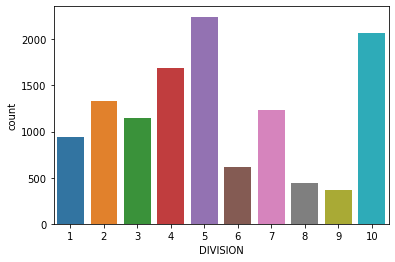

In [21]:
sns.countplot(train.DIVISION)

<AxesSubplot:xlabel='NUMFLRS', ylabel='count'>

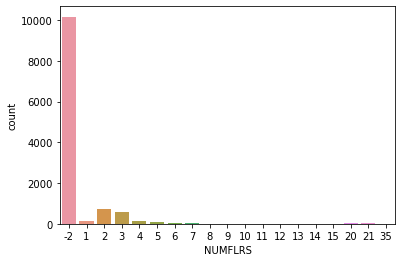

In [22]:
sns.countplot(train.NUMFLRS)

In [23]:
train.groupby(['TYPEHUQ', 'NAPTFLRS']).size()

TYPEHUQ  NAPTFLRS
1        -2           541
2        -2          7803
3        -2           890
4         1           796
          2           124
          3             6
5         1          1789
          2           126
          3             8
dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

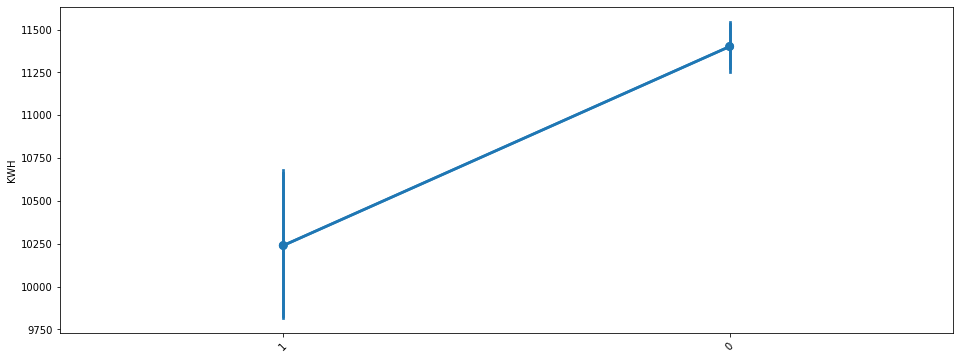

In [24]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.ZTOTSQFT.values, y = train.KWH,
               order = train.groupby('ZTOTSQFT')['KWH'].mean().sort_values().index)
sns.pointplot(x = train.ZTOTSQFT.values, y = train.KWH,
               order = train.groupby('ZTOTSQFT')['KWH'].mean().sort_values().index)
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'REGIONC Column')

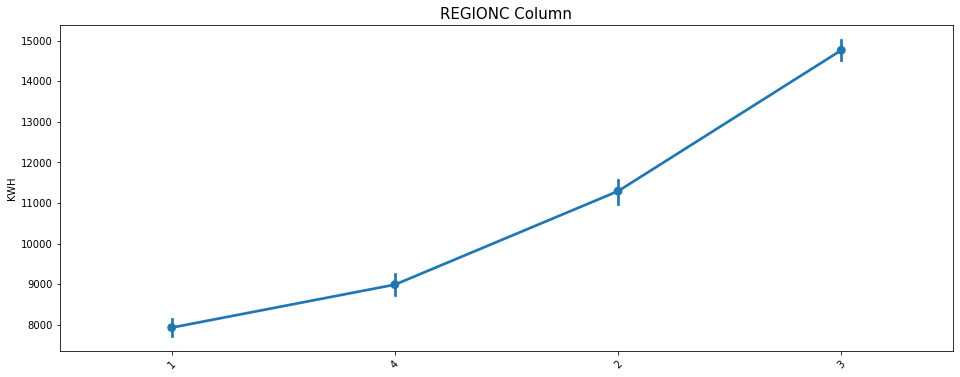

In [25]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.REGIONC.values, y = train.KWH,
               order = train.groupby('REGIONC')['KWH'].mean().sort_values().index)
plt.xticks(rotation = 45)
plt.title('REGIONC Column', size = 15)

Text(0.5, 1.0, 'METROMICRO Column')

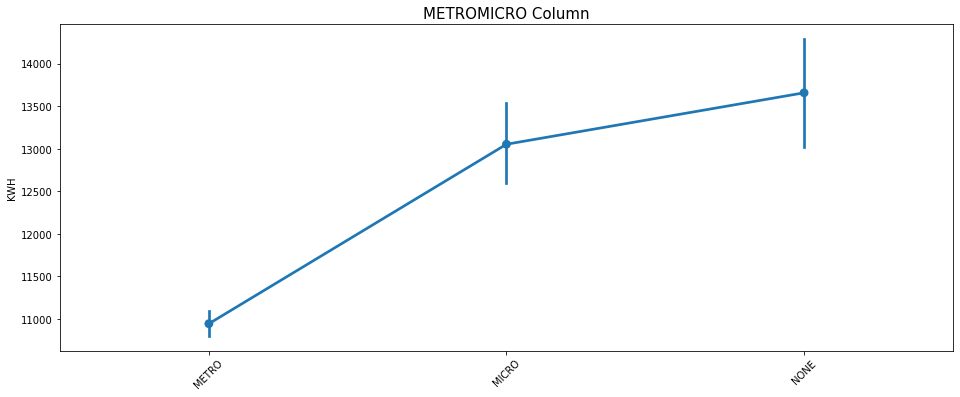

In [26]:

plt.figure(figsize=(16,6))
sns.pointplot(x = train.METROMICRO.values, y = train.KWH,
               order = train.groupby('METROMICRO')['KWH'].mean().sort_values().index)
plt.xticks(rotation = 45)
plt.title('METROMICRO Column', size = 15)

Text(0.5, 1.0, 'ATTIC Column')

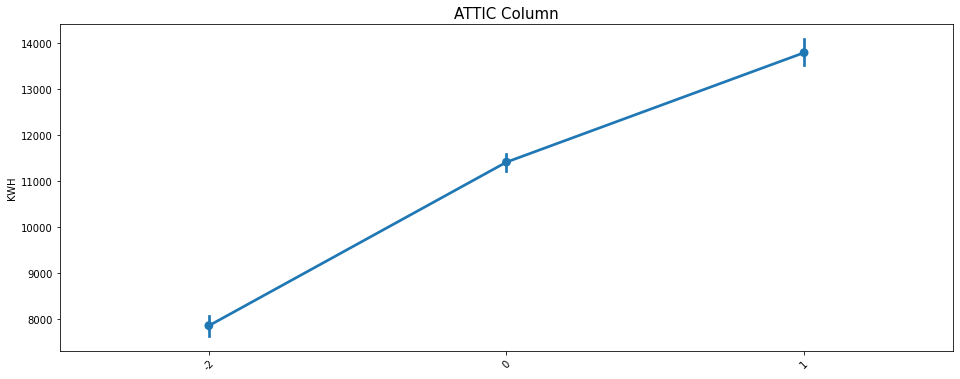

In [27]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.ATTIC.values, y = train.KWH,
               order = train.groupby('ATTIC')['KWH'].mean().sort_values().index)
plt.xticks(rotation = 45)
plt.title('ATTIC Column', size = 15)

<AxesSubplot:ylabel='Frequency'>

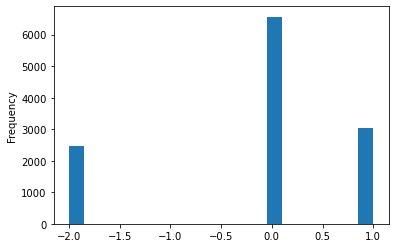

In [28]:
# this is to check if -2 value is reliable or not. looks like it is describing some feature, it is not some error in reporting
train.ATTIC.plot(kind = 'hist',bins = 20)


# some numerical features

Text(0, 0.5, ' KWH')

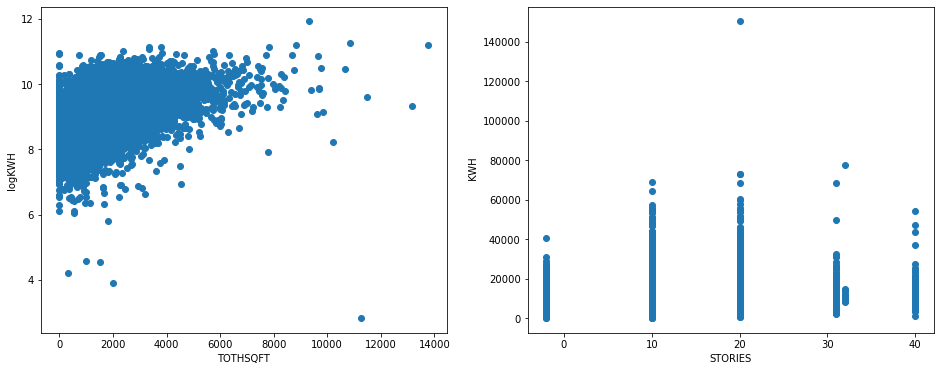

In [29]:
fig, axes = plt.subplots(1, 2,figsize=(16,6))
axes[0].scatter(train.TOTHSQFT, train.logKWH)
axes[0].set_xlabel("TOTHSQFT")
axes[0].set_ylabel("logKWH")
axes[1].scatter(train.STORIES, train.KWH)
axes[1].set_xlabel("STORIES")
axes[1].set_ylabel(" KWH")

## some outliers here

In [30]:
train[train.KWH > 140000]

,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,BASEHEAT,BASEHT2,PCTBSTHT,BASECOOL,BASECL2,PCTBSTCL,BASEUSE,ATTIC,ATTICFIN,FINATTRMS,ATTCHEAT,ATTCHT2,PCTATTHT,ATTCCOOL,ATTCCL2,PCTATTCL,ATTICUSE,PRKGPLC1,SIZEOFGARAGE,GARGLOC,GARGHEAT,GARGCOOL,PRKGPLC2,SIZEOFDETACH,OUTLET,ZKOWNRENT,ZCONDCOOP,ZYEARMADE,ZYEARMADERANGE,ZOCCUPYYRANGE,ZCONVERSION,ZORIG1FAM,ZLOOKLIKE,ZNUMFLRS,ZNUMAPTS,ZWALLTYPE,ZROOFTYPE,ZSTUDIO,ZNAPTFLRS,ZSTORIES,ZTYPEHUQ4,ZBEDROOMS,ZNCOMBATH,ZNHAFBATH,ZOTHROOMS,ZCELLAR,ZCRAWL,ZCONCRETE,ZBASEFIN,ZFINBASERMS,ZBASEHEAT,ZBASEHT2,ZPCTBSTHT,ZBASECOOL,ZBASECL2,ZPCTBSTCL,ZBASEUSE,ZATTIC,ZATTICFIN,ZFINATTRMS,ZATTCHEAT,ZATTCHT2,ZPCTATTHT,ZATTCCOOL,ZPCTATTCL,ZATTCCL2,ZATTICUSE,ZPRKGPLC1,ZSIZEOFGARAGE,ZGARGLOC,ZGARGHEAT,ZGARGCOOL,ZPRKGPLC2,ZSIZEOFDETACH,STOVEN,STOVENFUEL,STOVE,STOVEFUEL,OVEN,OVENFUEL,OVENUSE,OVENCLN,TYPECLN,MICRO,AMTMICRO,DEFROST,OUTGRILL,OUTGRILLFUEL,TOPGRILL,STGRILA,TOASTER,NUMMEAL,FUELFOOD,COFFEE,NUMFRIG,TYPERFR1,SIZRFRI1,REFRIGT1,ICE,AGERFRI1,ESFRIG,REPLCFRI,HELPFRI,HELPFRIY,TYPERFR2,SIZRFRI2,REFRIGT2,MONRFRI2,AGERFRI2,ESFRIG2,TYPERFR3,SIZRFRI3,REFRIGT3,MONRFRI3,AGERFRI3,ESFRIG3,SEPFREEZ,NUMFREEZ,UPRTFRZR,SIZFREEZ,FREEZER,AGEFRZR,REPLCFRZ,HELPFRZ,HELPFRZY,UPRTFRZR2,SIZFREEZ2,FREEZER2,AGEFRZR2,DISHWASH,DWASHUSE,AGEDW,ESDISHW,REPLCDW,HELPDW,HELPDWY,ZSTOVEN,ZSTOVENFUEL,ZSTOVE,ZSTOVEFUEL,ZOVEN,ZOVENFUEL,ZOVENUSE,ZOVENCLN,ZTYPECLN,ZMICRO,ZAMTMICRO,ZDEFROST,ZOUTGRILL,ZOUTGRILLFUEL,ZTOPGRILL,ZSTGRILA,ZTOASTER,ZNUMMEAL,ZFUELFOOD,ZCOFFEE,ZNUMFRIG,ZTYPERFR1,ZSIZRFRI1,ZREFRIGT1,ZICE,ZAGERFRI1,ZTYPERFR2,ZSIZRFRI2,ZREFRIGT2,ZMONRFRI2,ZAGERFRI2,ZTYPERFR3,ZSIZRFRI3,ZREFRIGT3,ZMONRFRI3,ZAGERFRI3,ZSEPFREEZ,ZNUMFREEZ,ZUPRTFRZR,ZSIZFREEZ,ZFREEZER,ZAGEFRZR,ZUPRTFRZR2,ZSIZFREEZ2,ZFREEZER2,ZAGEFRZR2,ZDISHWASH,ZDWASHUSE,ZAGEDW,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,AGECWASH,ESCWASH,REPLCCW,HELPCW,HELPCWY,DRYER,DRYRFUEL,DRYRUSE,AGECDRYER,TVCOLOR,TVSIZE1,TVTYPE1,CABLESAT1,COMBODVR1,DVR1,DIGITSTB1,PLAYSTA1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWD1,TVONWDWATCH1,TVONWE1,TVONWEWATCH1,TVSIZE2,TVTYPE2,CABLESAT2,COMBODVR2,DVR2,DIGITSTB2,PLAYSTA2,COMBOVCRDVD2,VCR2,DVD2,TVAUDIOSYS2,OTHERSTB2,TVONWD2,TVONWDWATCH2,TVONWE2,TVONWEWATCH2,TVSIZE3,TVTYPE3,CABLESAT3,COMBODVR3,DVR3,DIGITSTB3,PLAYSTA3,COMBOVCRDVD3,VCR3,DVD3,TVAUDIOSYS3,OTHERSTB3,TVONWD3,TVONWDWATCH3,TVONWE3,TVONWEWATCH3,COMPUTER,NUMPC,PCTYPE1,MONITOR1,TIMEON1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,TIMEON2,PCONOFF2,PCSLEEP2,PCTYPE3,MONITOR3,TIMEON3,PCONOFF3,PCSLEEP3,INTERNET,INDIALUP,INDSL,INCABLE,INSATEL,INWIRELESS,PCPRINT,FAX,COPIER,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,BATCHRG,CHRGPLGT,ELECDEV,ELECCHRG,CHRGPLGE,ZCWASHER,ZTOPFRONT,ZWASHLOAD,ZWASHTEMP,ZRNSETEMP,ZAGECWASH,ZDRYER,ZDRYRFUEL,ZDRYRUSE,ZAGECDRYER,ZTVCOLOR,ZTVSIZE1,ZTVTYPE1,ZCABLESAT1,ZCOMBODVR1,ZDVR1,ZDIGITSTB1,ZPLAYSTA1,ZCOMBOVCRDVD1,ZVCR1,ZDVD1,ZTVAUDIOSYS1,ZOTHERSTB1,ZTVONWD1,ZTVONWDWATCH1,ZTVONWE1,ZTVONWEWATCH1,ZTVSIZE2,ZTVTYPE2,ZCABLESAT2,ZCOMBODVR2,ZDVR2,ZDIGITSTB2,ZPLAYSTA2,ZCOMBOVCRDVD2,ZVCR2,ZDVD2,ZTVAUDIOSYS2,ZOTHERSTB2,ZTVONWD2,ZTVONWDWATCH2,ZTVONWE2,ZTVONWEWATCH2,ZTVSIZE3,ZTVTYPE3,ZCABLESAT3,ZCOMBODVR3,ZDVR3,ZDIGITSTB3,ZPLAYSTA3,ZCOMBOVCRDVD3,ZVCR3,ZDVD3,ZTVAUDIOSYS3,ZOTHERSTB3,ZTVONWD3,ZTVONWDWATCH3,ZTVONWE3,ZTVONWEWATCH3,ZCOMPUTER,ZNUMPC,ZPCTYPE1,ZMONITOR1,ZTIMEON1,ZPCONOFF1,ZPCSLEEP1,ZPCTYPE2,ZMONITOR2,ZTIMEON2,ZPCONOFF2,ZPCSLEEP2,ZPCTYPE3,ZMONITOR3,ZTIMEON3,ZPCONOFF3,ZPCSLEEP3,ZINTERNET,ZINDIALUP,ZINDSL,ZINCABLE,ZINSATEL,ZINWIRELESS,ZPCPRINT,ZFAX,ZCOPIER,ZWELLPUMP,ZDIPSTICK,ZSWAMPCOL,ZAQUARIUM,ZSTEREO,ZNOCORD,ZANSMACH,ZBATTOOLS,ZBATCHRG,ZCHRGPLGT,ZELECDEV,ZELECCHRG,ZCHRGPLGE,HEATHOME,DNTHEAT,EQUIPNOHEAT,FUELNOHEAT,EQUIPM,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,HELPHT,H

In [31]:
index_to_drop_later = train[train.KWH > 140000].index.tolist()
index_to_drop_later

[3551]

In [32]:
train[['DIVISION','logKWH']].sort_values('DIVISION').head()

,DIVISION,logKWH
7579,1,9.840867
1950,1,9.087495
8460,1,8.147578
1938,1,8.778942
6059,1,8.607765


Text(0.5, 1.0, 'DIVISION')

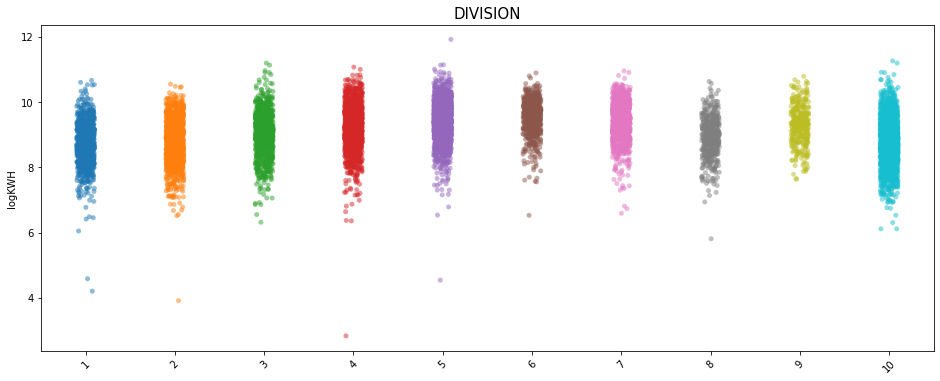

In [33]:
plt.figure(figsize=(16,6))
sns.stripplot(x = train.DIVISION.values, y = train.logKWH, order= np.sort(train.DIVISION.unique()),
              jitter= 0.1 , alpha = 0.5)
plt.xticks(rotation = 45)
plt.title('DIVISION', size = 15)

Text(0.5, 1.0, 'REGIONC')

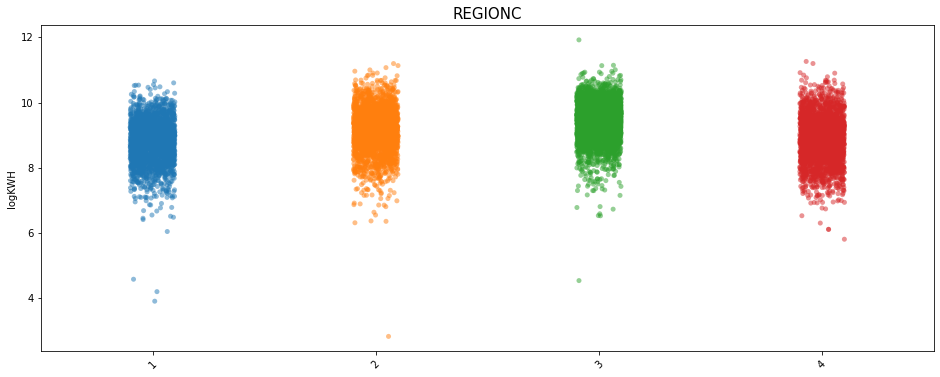

In [34]:
plt.figure(figsize=(16,6))
sns.stripplot(x = train.REGIONC.values, y = train.logKWH, order= np.sort(train.REGIONC.unique()),
              jitter= 0.1 , alpha = 0.5)
plt.xticks(rotation = 45)
plt.title('REGIONC', size = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '10'),
  Text(2, 0, '2'),
  Text(3, 0, '8'),
  Text(4, 0, '3'),
  Text(5, 0, '4'),
  Text(6, 0, '9'),
  Text(7, 0, '7'),
  Text(8, 0, '5'),
  Text(9, 0, '6')])

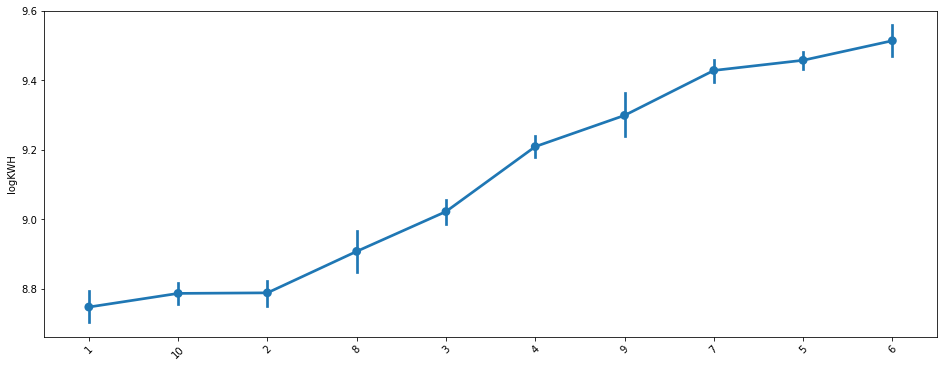

In [35]:
plt.figure(figsize=(16,6))
sns.pointplot(x = train.DIVISION.values, y = train.logKWH,
               order = train.groupby('DIVISION')['logKWH'].mean().sort_values().index)
plt.xticks(rotation = 45)

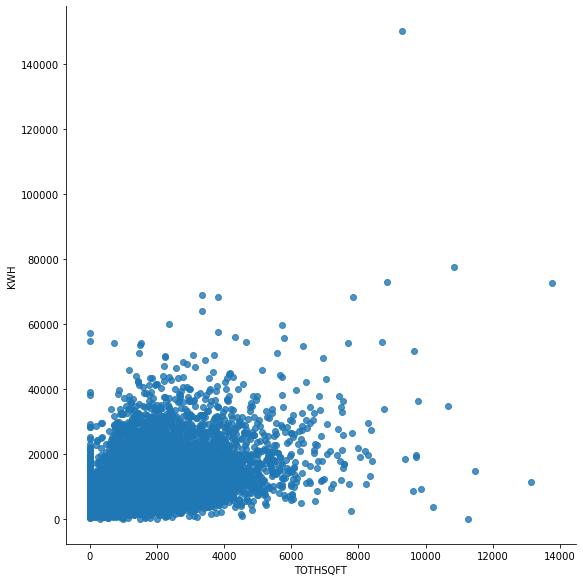

In [36]:
sns.lmplot("TOTHSQFT", "KWH",data=train,fit_reg=False,palette="Set1",size=8)


<AxesSubplot:>

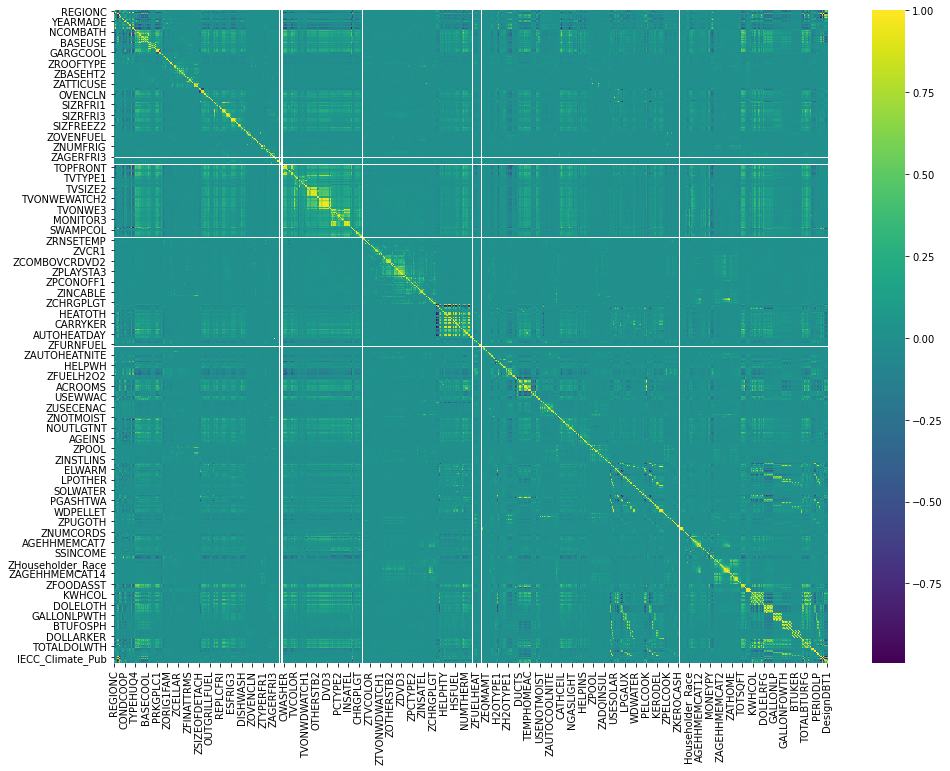

In [107]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(),cmap='viridis')

# too much crowded not able tos ee relevant features from here

## Next steps:

- columns to drop
- Handling categorical features


In [37]:
train.select_dtypes(include=["object"]).columns.tolist()

['METROMICRO', 'UR', 'NOCRCASH', 'NKRGALNC', 'IECC_Climate_Pub']

In [38]:
train.METROMICRO.unique()

array(['METRO', 'MICRO', 'NONE'], dtype=object)

In [39]:
#train.METROMICRO = df_ordinal.BsmtCond.replace({'Po' : 1, 'Fa': 2, 'TA' : 3, 'Gd' : 4 , 'Ex' : 5}).fillna(0)
le = LabelEncoder()
train.METROMICRO = le.fit_transform(train['METROMICRO'])

In [40]:
train.UR = le.fit_transform(train['UR'])
train.NOCRCASH = le.fit_transform(train['NOCRCASH'].astype(str))
train.NKRGALNC = le.fit_transform(train['NKRGALNC'].astype(str))
train.IECC_Climate_Pub = le.fit_transform(train['IECC_Climate_Pub'].astype(str))

In [41]:
train.select_dtypes(include=["object"]).columns.tolist()

[]

In [42]:
train.isnull().sum().sum()

0

# Perfect! its looks like we have clean data now!

In [43]:
train.drop(['KWH'],axis=1,inplace=True)
all_data = train

In [44]:
#Function  spliting data for trainig:

def which_data(df_train):    
    from sklearn.model_selection import train_test_split
    y = df_train.logKWH
    X = df_train.drop('logKWH',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=101)
    return X_train, X_test, y_train, y_test

def prediction(df_test):
    X_test = df_test.values
    return X_test

def cost_fun(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred)) 

# models
- XGB REGRESSOR
- Finding the best parameters using grid search
- random forest
- SVM
- lenior regressor
- gradient boosting regressor
- LASSO
- ANN using keras

In [68]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD

## XGBRegressor

In [46]:
xg_model = XGBRegressor()
X_train, X_test, y_train, y_test = which_data(df_train = all_data)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.0065315148460935125

## XGBoos GridSearchCV

In [51]:
train.dtypes.value_counts()

int64      883
float64     51
int32        5
dtype: int64

In [52]:
'''X_train, X_test, y_train, y_test = which_data(df_train = all_data)

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators  =  [80, 100, 120, 140]
max_depth     = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators,learning_rate = learning_rate)

#param_grid = dict(learning_rate=learning_rate)

xg_model = XGBRegressor()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(xg_model, param_grid, scoring= 'neg_mean_squared_error', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best results:" grid_result.best_score_, grid_result.best_params_)
'''

#using grid search I can look for best parameters for xgboost. Unfortunately it is giving some error at present

'X_train, X_test, y_train, y_test = which_data(df_train = all_data)\n\nlearning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]\nn_estimators  =  [80, 100, 120, 140]\nmax_depth     = [2, 4, 6, 8]\nparam_grid = dict(max_depth=max_depth, n_estimators=n_estimators,learning_rate = learning_rate)\n\n#param_grid = dict(learning_rate=learning_rate)\n\nxg_model = XGBRegressor()\nkfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)\ngrid_search = GridSearchCV(xg_model, param_grid, scoring= \'neg_mean_squared_error\', n_jobs=-1, cv=kfold)\ngrid_result = grid_search.fit(X_train, y_train)\n# summarize results\nprint("Best results:" grid_result.best_score_, grid_result.best_params_)\n'

# Random forest

In [56]:
X_train, X_test, y_train, y_test = which_data(df_train = all_data)
rf  = RandomForestRegressor(n_estimators=101)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)## XGBoost
cost_fun(y_pred,y_test)

0.004388180929878066

# SVM: it didnt perform well

In [58]:
svm_R= svm.SVR()
svm_R.fit(X_train,y_train)
y_pred = svm_R.predict(X_test)
cost_fun(y_test,y_pred)

0.1137956710461995

# decision tree

In [59]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
cost_fun(y_test,y_pred)

0.004672406957923018

# Linear Regression

In [62]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
cost_fun(y_test,y_pred)

3.795214070496367

## GradientBoostingRegressor

In [64]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
cost_fun(y_test,y_pred)

0.009404285082103404

## LASSO

In [67]:
lasso=Lasso(alpha=5e-4, max_iter=50000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test) 
cost_fun(y_pred,y_test)

0.28222173101675646

## ANN Using keras

In [76]:
ann = Sequential()
ann.add(Dense(units = 128, activation = "relu", input_dim = X_train.shape[1],kernel_initializer='normal'))
ann.add(Dropout(0.5))
ann.add(Dense(units = 128, activation="relu",kernel_initializer='normal'))
ann.add(Dropout(0.5))
ann.add(Dense(units=1))
ann.compile(optimizer='adam',loss='mse')
ann.fit(X_train,y_train,epochs=1000,batch_size=20,verbose=0)
y_pred = ann.predict(X_test,verbose=0)
cost_fun(y_test,y_pred)

0.2628272240214259

Summary
- We got a good model using decision tree and random forest. we can defintely go for DNN to enhance the performance. We can work on dimentionality reduction methods to get the better results. we can look at Variance Threshold or ANOVA technique or Fisher’s Score for feature selection. 